# SparseEdges : including prior information on first-order distribution of orientations


Using prior information in the edge extraction


Table of content

* [Prior on first-order distribution of orientations](#Prior-on-first-order-distribution-of-orientations)
* [Prior on second-order distribution of edge co-occurences](#Prior-on-second-order-distribution-of-orientations)
* [Application to segmentation](#Application-to-segmentation)


## Initialization

In [25]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
from __future__ import division, print_function
%matplotlib inline
%config InlineBackend.figure_format='retina'
#%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)
FORMATS = ['pdf', 'eps']

defining framework


In [27]:
from SparseEdges import SparseEdges
mp = SparseEdges('https://raw.githubusercontent.com/meduz/SparseEdges/master/default_param.py')
mp.pe.datapath = 'database'
mp.pe.noise = 0.5

print ('Range of spatial frequencies: ', mp.sf_0)

Range of spatial frequencies:  [ 0.62  0.38  0.24  0.15  0.09  0.06  0.03  0.02  0.01  0.01  0.01]


In [28]:
name_database_ = 'serre07_distractors_urban'
name_database_ = 'serre07_distractors'

In [29]:
print ('Range of angles: ', mp.theta*180./np.pi)

Range of angles:  [-82.5 -75.  -67.5 -60.  -52.5 -45.  -37.5 -30.  -22.5 -15.   -7.5   0.
   7.5  15.   22.5  30.   37.5  45.   52.5  60.   67.5  75.   82.5  90. ]


## Running simulations on using the Prior on first-order distribution of orientations

In [30]:
%cd test

[Errno 2] No such file or directory: 'test'
/Users/lolo/pool/science/BICV-book/SI_BICV_sparse/SparseEdges/test


In [31]:
%ls ../../SLIP/database/

lean128.png*  lena512.png*	    serre07_targets/  yelmo512.png*
lena128.png*  lena64.png*	    yelmo128.png*     yelmo64.png*
lena256.png*  serre07_distractors/  yelmo256.png*


In [32]:
%%writefile experiment_fig-firstorder.py
# -*- coding: utf8 -*-
from __future__ import division, print_function
"""

$ python experiment_fig-firstorder.py

rm -fr **/prior_* **/**/prior_*
rm -fr **/prior_vanilla* **/**/prior_vanilla*
rm -fr **/prior_vanilla_noise_* **/**/prior_vanilla_noise_*
rm -fr **/prior_firstorder* **/**/prior_firstorder*

"""
import numpy as np
from SparseEdges import SparseEdges

for name_database in ['serre07_distractors']:#, 'serre07_distractors_urban', 'laboratory']:
    mp = SparseEdges('https://raw.githubusercontent.com/meduz/SparseEdges/master/default_param.py')
    mp.pe.datapath = '../../SLIP/database/'
    mp.pe.seed = 21341353 # this ensures that all image lists are the same for the different experiments
    mp.pe.N_image = 20
    mp.pe.N = 1024

    # control experiment
    #mp.theta = np.linspace(-np.pi/2, np.pi/2, mp.n_theta+1)[1:]
    imageslist, edgeslist, RMSE = mp.process(exp='prior_vanilla', name_database=name_database)

    imageslist_noise, edgeslist_noise, RMSE_noise = mp.process(exp='prior_vanilla_noise_' + str(mp.pe.noise).replace('.', '_'), name_database=name_database, noise=mp.pe.noise)

    if True:#try:
        six, N, N_image = edgeslist.shape
        # first-order prior
        v_hist, v_theta_edges = mp.histedges_theta(edgeslist, display=False)
        v_theta_middles, v_theta_bin  = (v_theta_edges[1:]+v_theta_edges[:-1])/2, v_theta_edges[1]-v_theta_edges[0]
        v_hist, v_theta_edges = mp.histedges_theta(edgeslist, display=False)
        v_theta_middles, v_theta_bin  = (v_theta_edges[1:]+v_theta_edges[:-1])/2, v_theta_edges[1]-v_theta_edges[0]

        z = np.linspace(0, 1., mp.pe.n_theta+1)
        P = np.cumsum(np.hstack((0, v_hist[-1]/2, v_hist[:-1], v_hist[-1]/2)))
        
        theta_prior = np.interp(z, P, np.hstack((v_theta_edges[0]-v_theta_bin/2, v_theta_edges[:-1], v_theta_edges[-1]-v_theta_bin/2)))

        mp = SparseEdges('https://raw.githubusercontent.com/meduz/SparseEdges/master/default_param.py')
        mp.pe.datapath = '../../SLIP/database/'
        mp.pe.seed = 21341353 # this ensures that all image lists are the same for the different experiments
        mp.pe.N_image = 20
        mp.pe.N = 1024
        
        imageslist, edgeslist, RMSE =  mp.process(exp='prior_firstorder', name_database=name_database)
        mp.MP_rho = .994304364466
        imageslist, edgeslist, RMSE = mp.process(exp='prior_quant_firstorder', name_database=name_database)
        mp.MP_rho = None
        imageslist_noise, edgeslist_noise, RMSE_noise = mp.process(exp='prior_firstorder_noise_' + str(mp.pe.noise).replace('.', '_'), name_database=name_database, noise=mp.pe.noise)
    #except:
    #    print('run again once first batches are finished ')

    mp.MP_rho = .994304364466
    imageslist, edgeslist, RMSE = mp.process(exp='prior_quant', name_database=name_database)
    mp.MP_rho = None


Overwriting experiment_fig-firstorder.py


In [33]:
%run experiment_fig-firstorder.py

INFO:SLIP: > computing edges for experiment prior_vanilla with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment prior_vanilla RMSE = 0.130162 
INFO:SLIP: > computing edges for experiment prior_vanilla_noise_0_33 with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment prior_vanilla_noise_0_33 RMSE = 0.553178 
INFO:SLIP: > computing edges for experiment prior_firstorder with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment prior_firstorder RMSE = 0.111597 
INFO:SLIP: > computing edges for experiment prior_quant_firstorder with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment prior_quant_firstorder RMSE = 0.111597 
INFO:SLIP: > computing edges for experiment prior_firstorder_noise_0_33 with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment prior_firstorder_noise_0_33 RMSE = 0

## Analysing results on using the Prior on first-order distribution of orientations

First, we retrieve edges from a prior edge extraction

In [34]:
imageslist, edgeslist, RMSE = mp.process(exp='prior_vanilla_noise_' + str(mp.pe.noise).replace('.', '_'), name_database=name_database_)

INFO:SLIP: > computing edges for experiment prior_vanilla_noise_0_33 with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment prior_vanilla_noise_0_33 RMSE = 0.553178 


In [35]:
imageslist, edgeslist, RMSE = mp.process(exp='prior_vanilla', name_database=name_database_)

INFO:SLIP: > computing edges for experiment prior_vanilla with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment prior_vanilla RMSE = 0.130162 


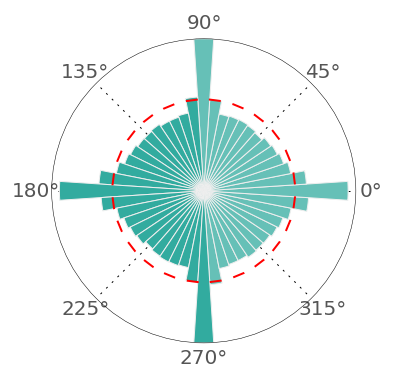

In [36]:
#fig, (a1, a2) = plt.subplots(1, 2)
#fig, a1 = mp.histedges_theta(edgeslist, fig=fig, a=a1)
#fig, a2 = mp.histedges_theta(edgeslist, fig=fig, a=a1)
fig_width_pt = 318.670  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig = plt.figure(figsize=(fig_width/1.618, fig_width/1.618))
ax = fig.add_subplot(111, axisbg='w', polar=True)
fig, ax = mp.histedges_theta(edgeslist, fig=fig, a=ax)
v_hist, v_theta_edges = mp.histedges_theta(edgeslist, display=False)
ax.plot(v_theta_edges, np.ones_like(v_theta_edges)*np.sqrt(v_hist.mean()), 'r--')
ax.plot(v_theta_edges+np.pi, np.ones_like(v_theta_edges)*np.sqrt(v_hist.mean()), 'r--')

for ext in FORMATS: fig.savefig(mp.pe.figpath + 'firstorder_A.' + ext)

In [37]:
v_hist, v_theta_edges = mp.histedges_theta(edgeslist, display=False)
v_theta_middles, v_theta_bin  = (v_theta_edges[1:]+v_theta_edges[:-1])/2, v_theta_edges[1]-v_theta_edges[0]

In [38]:
print ('angles for the edges of bins (deg) = ', v_theta_edges*180/np.pi)
print ('angles for the middle of bins (deg) = ', v_theta_middles*180/np.pi)
print ('angles for the center of bins (deg) = ', (v_theta_edges-v_theta_bin/2)*180/np.pi)

angles for the edges of bins (deg) =  [-86.25 -78.75 -71.25 -63.75 -56.25 -48.75 -41.25 -33.75 -26.25 -18.75
 -11.25  -3.75   3.75  11.25  18.75  26.25  33.75  41.25  48.75  56.25
  63.75  71.25  78.75  86.25  93.75]
angles for the middle of bins (deg) =  [-82.5 -75.  -67.5 -60.  -52.5 -45.  -37.5 -30.  -22.5 -15.   -7.5  -0.
   7.5  15.   22.5  30.   37.5  45.   52.5  60.   67.5  75.   82.5  90. ]
angles for the center of bins (deg) =  [-90.  -82.5 -75.  -67.5 -60.  -52.5 -45.  -37.5 -30.  -22.5 -15.   -7.5
  -0.    7.5  15.   22.5  30.   37.5  45.   52.5  60.   67.5  75.   82.5
  90. ]


Now, we may use this statistics:


In [39]:
z = np.linspace(0, 1., mp.pe.n_theta+1)
P = np.cumsum(np.hstack((0, v_hist[-1]/2, v_hist[:-1], v_hist[-1]/2)))
#theta_prior = np.interp(z, P, v_theta_middles)
#theta_prior = np.interp(z, P, np.hstack((v_theta_edges[-1]-np.pi, v_theta_edges))) #% np.pi
#theta_prior = np.interp(z, P, v_theta_edges-v_theta_bin/2) #% np.pi
theta_prior = np.interp(z, P, np.hstack((v_theta_edges[0]-v_theta_bin/2, v_theta_edges[:-1], v_theta_edges[-1]-v_theta_bin/2))) #% np.pi
#print z.shape, P.shape, P[0], P[-1], theta_prior.shape

In [40]:
z = z[1:]
P = P[1:]
print ('z = ', z)
print ('P = ', P)
#print pe.n_theta, z.shape, P.shape
#print np.hstack((0, np.cumsum(v_hist)))
print ('angles (deg) = ', mp.theta*180/np.pi)
print ('angles (deg) = ', theta_prior*180/np.pi)
#print 'angles (deg) = ', np.interp(z, np.hstack((0, np.cumsum(v_hist))), (v_theta_edges-v_theta_bin/2))*180/np.pi
#print mp.theta.shape, theta_prior.shape
print ('angles (deg) = ', theta_prior[1:]*180/np.pi)

z =  [ 0.04  0.08  0.12  0.17  0.21  0.25  0.29  0.33  0.38  0.42  0.46  0.5
  0.54  0.58  0.62  0.67  0.71  0.75  0.79  0.83  0.88  0.92  0.96  1.  ]
P =  [ 0.06  0.1   0.13  0.16  0.19  0.22  0.26  0.29  0.32  0.36  0.4   0.45
  0.55  0.61  0.65  0.68  0.71  0.75  0.78  0.81  0.84  0.87  0.9   0.94
  1.  ]
angles (deg) =  [-82.5 -75.  -67.5 -60.  -52.5 -45.  -37.5 -30.  -22.5 -15.   -7.5   0.
   7.5  15.   22.5  30.   37.5  45.   52.5  60.   67.5  75.   82.5  90. ]
angles (deg) =  [-90.   -87.29 -81.87 -73.14 -62.84 -52.67 -42.72 -32.84 -23.57 -15.09
  -8.32  -3.16  -0.15   2.86   7.93  14.76  23.17  32.31  41.98  52.35
  62.38  72.44  81.63  87.29  90.  ]
angles (deg) =  [-87.29 -81.87 -73.14 -62.84 -52.67 -42.72 -32.84 -23.57 -15.09  -8.32
  -3.16  -0.15   2.86   7.93  14.76  23.17  32.31  41.98  52.35  62.38
  72.44  81.63  87.29  90.  ]


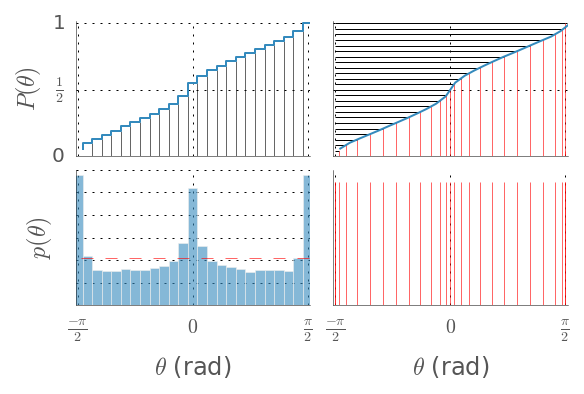

In [41]:
fig, [[B, C], [A, D]] = plt.subplots(2, 2, figsize=(fig_width, fig_width/1.618), subplot_kw={'axisbg':'w'}, sharex=True)
for ax in [A, B, C, D]:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
#  subplots_adjust(left=None, bottom=None, right=None, top=None,
#                  wspace=None, hspace=None)
#
#The parameter meanings (and suggested defaults) are::
#
#  left  = 0.125  # the left side of the subplots of the figure
#  right = 0.9    # the right side of the subplots of the figure
#  bottom = 0.1   # the bottom of the subplots of the figure
#  top = 0.9      # the top of the subplots of the figure
#  wspace = 0.2   # the amount of width reserved for blank space between subplots
#  hspace = 0.2   # the amount of height reserved for white space between subplots
fig.subplots_adjust(wspace=0.1, hspace=0.1,
                    left=0.125, right=0.9,
                    top=0.9,    bottom=0.175)
A.bar(v_theta_edges-v_theta_bin, np.hstack((v_hist[-1], v_hist)), alpha=.6, width=v_theta_bin)
#A.bar(v_theta_edges[:-1], v_hist, alpha=.6, width=v_theta_bin, align='edge')
A.hlines([v_hist.mean()], [v_theta_edges[0]-v_theta_bin/8.], [v_theta_edges[-1]+v_theta_bin/8.], lw=.5, color='r', linestyle='--', alpha=.6)
plt.setp(A, yticklabels=[], ylabel=r'$p(\theta)$',#xlim=[v_theta_edges[0]-v_theta_bin/4, v_theta_edges[-1]+v_theta_bin/4], 
         #xticks=[-np.pi/2, 0, np.pi/2], xticklabels=[r'$\frac{-\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$'], 
         xticks=[0, np.pi/2], xticklabels=[r'$0$', r'$\frac{\pi}{2}$'], 
         xlabel=r'$\theta$ (rad)')
B.step(v_theta_edges, P, where='pre')
B.vlines(((mp.theta[:-1] + np.pi/2 + v_theta_bin/4)  % np.pi ) - np.pi/2  + v_theta_bin/4, [0], P[1:], lw=.5, color='k', alpha=.6)
plt.setp(B, xticks=[], ylim=[0, 1.02], yticks=[0., 0.5, 1.], yticklabels=['0', r'$\frac{1}{2}$', '1'], ylabel=r'$P(\theta)$')#, xlim=[v_theta_edges[0], v_theta_edges[-1]]
#B.text(-np.pi/2*1.65, 1.05, '(B)')
C.plot(v_theta_edges, P)
C.hlines(z[:-1], [v_theta_edges[0]-v_theta_bin/2], theta_prior[1:], lw=.5)
C.hlines([1], [v_theta_edges[0]-v_theta_bin/2], theta_prior[-1], lw=.5)
C.vlines(theta_prior[1:], [0], z[:-1], lw=.5, color='r', alpha=.6)
C.vlines(theta_prior[-1], [0], [1], lw=.5, color='r', alpha=.6)
#C.text(-np.pi/2*1.1, 1.05, '(C)')
bord = 0.03
plt.setp(C, ylim=[0,1.02], xticks=[-np.pi/2, 0, np.pi/2], xticklabels=['', '', ''], yticks=[0., 0.5, 1.], yticklabels=['', '', ''], xlim=[v_theta_edges[0]-v_theta_bin/2-bord, v_theta_edges[-1]-v_theta_bin/2+bord])#
#D.axis('tight')
#D.vlines((theta_prior + np.pi/2) % np.pi  - np.pi/2, [0], np.ones_like(z), lw=.5, color='r')
D.vlines(theta_prior, [0], np.ones_like(z), lw=.5, color='r', alpha=.6)
D.vlines([-np.pi/2, np.pi/2], [0], np.ones_like(z), lw=.5, color='r', alpha=.6)
#D.vlines(((mp.theta[:-1] + np.pi/2 + v_theta_bin/2)  % np.pi ) - np.pi/2  - v_theta_bin/2, [0], np.ones_like(z), lw=.5, color='k', alpha=.6)
#D.plot(theta, np.ones_like(z), ms='^', lw=0, color='r')
plt.setp(D, ylim=[0, 1.1], yticks=[], xlim=[v_theta_edges[0]-v_theta_bin/2-bord, v_theta_edges[-1]-v_theta_bin/2+bord], 
         xticks=[-np.pi/2, 0, np.pi/2], xticklabels=[r'$\frac{-\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$'], 
         #xticks=[0, np.pi/2], xticklabels=[r'$0$', r'$\frac{\pi}{2}$'], 
         xlabel=r'$\theta$ (rad)')
#D.text(-np.pi/2*1.1, 1.35, '(D)')
for ext in FORMATS: fig.savefig(mp.pe.figpath + 'laughlin.' + ext)

rho= 0.995351507017 , +/-  0.00358815873244


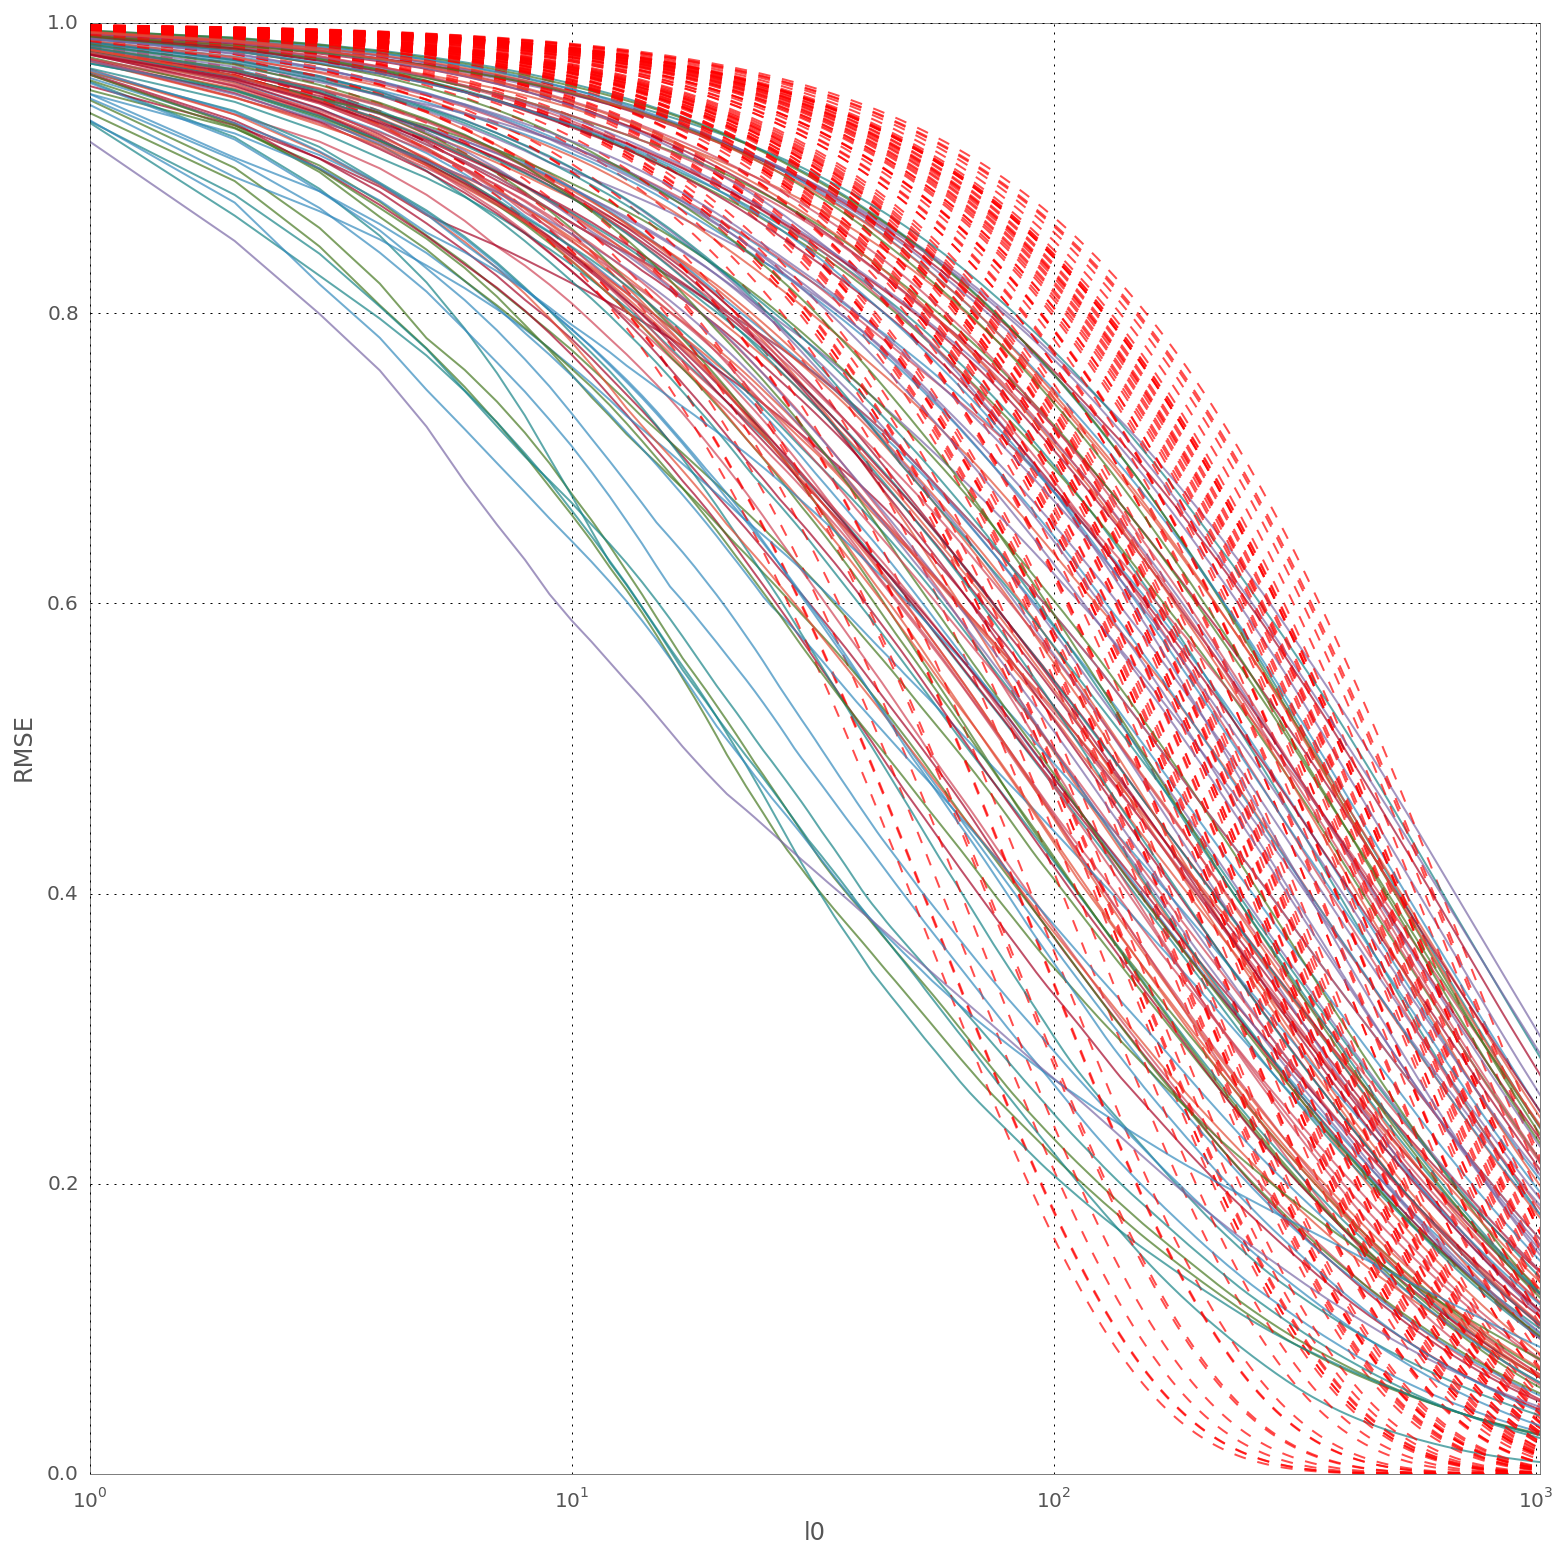

In [42]:
fig, A = plt.subplots(1, 1, figsize=(13, 13), subplot_kw={'axisbg':'w'})
from lmfit.models import ExpressionModel
#mod = PowerLawModel()
mod = ExpressionModel('rho**x')
RMSE /= RMSE[:, 0][:, np.newaxis]
N = RMSE.shape[1] #number of edges
rho = np.zeros(RMSE.shape[0])
for i_image in range(RMSE.shape[0]):
    #pars = mod.guess(RMSE[i_image, :], x=np.arange(N))
    mod.def_vals = {'rho':.99}
    out  = mod.fit(RMSE[i_image, :], x=np.arange(N))
    #print(out.fit_report(min_correl=0.25))
    rho[i_image] =  out.params.get('rho').value
    #print 'rho=', rho[i_image]
    #N_theta = np.log(threshold)/np.log(rho)
    #print N_theta
    A.semilogx( RMSE[i_image, :], alpha=.7)
    params = mod.make_params(rho=rho[i_image])
    A.semilogx(mod.eval(params, x=np.arange(N)), 'r--', alpha=.7)
    A.set_xlabel('l0')
    A.axis('tight')
    A.axis('tight')
    _ = A.set_ylabel('RMSE')            

print ('rho=', rho.mean(), ', +/- ', rho.std())

INFO:SLIP: > computing edges for experiment prior_vanilla with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment prior_vanilla RMSE = 0.130162 
INFO:SLIP: > computing edges for experiment prior_firstorder with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment prior_firstorder RMSE = 0.111597 
INFO:SLIP: > computing edges for experiment prior_vanilla_noise_0_33 with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment prior_vanilla_noise_0_33 RMSE = 0.553178 
INFO:SLIP: > computing edges for experiment prior_firstorder_noise_0_33 with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment prior_firstorder_noise_0_33 RMSE = 0.595971 


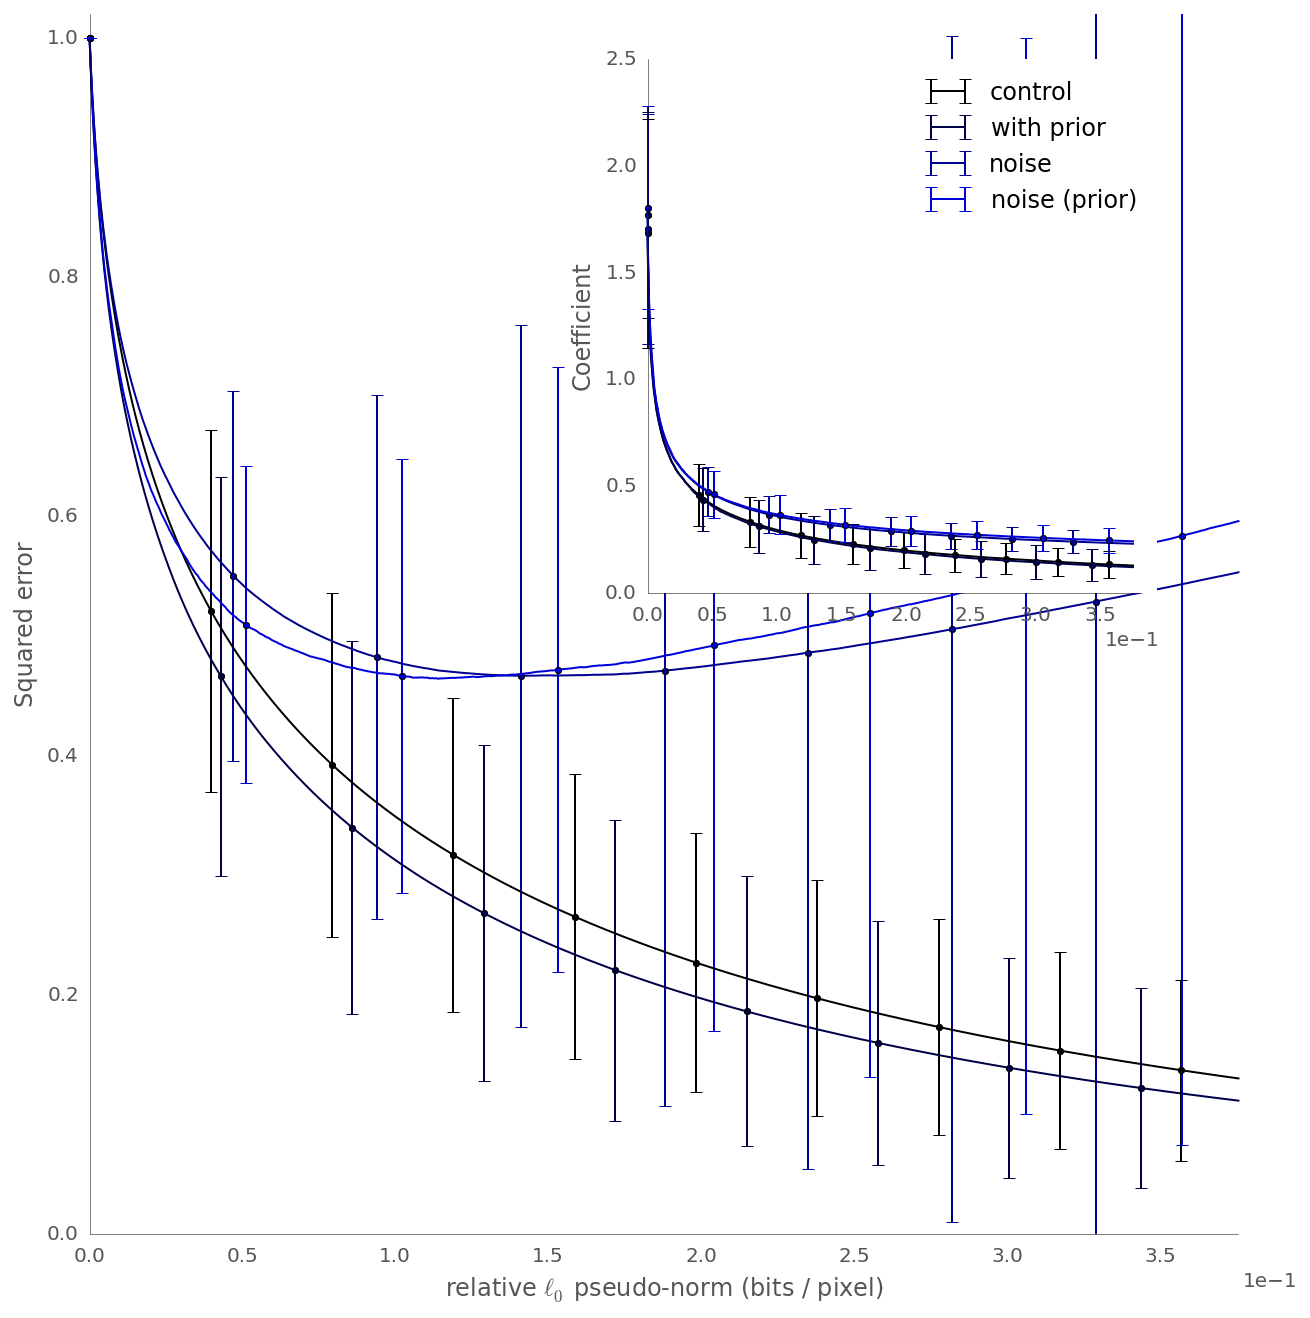

In [43]:
FORMATS = ['pdf', 'eps']
experiments = ['prior_vanilla', 'prior_firstorder', 'prior_vanilla_noise_' + str(mp.pe.noise).replace('.', '_'), 'prior_firstorder_noise_' + str(mp.pe.noise).replace('.', '_')]
databases = [name_database_] * len(experiments)
labels = ['control', 'with prior', 'noise', 'noise (prior)']
mps = [mp] * len(experiments)
fig_width = 15
fig = plt.figure(figsize=(fig_width/1.618, fig_width/1.618))
fig, a, ax = mp.plot(mps=mps, experiments=experiments, databases=databases, fig=fig, labels=labels, 
                  color=[0., 0., 1.], scale=True)#  


INFO:SLIP: > computing edges for experiment prior_vanilla with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment prior_vanilla RMSE = 0.130162 
INFO:SLIP: > computing edges for experiment prior_vanilla with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment prior_vanilla RMSE = 0.130162 
INFO:SLIP: > computing edges for experiment prior_firstorder with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment prior_firstorder RMSE = 0.111597 


(100,)
(20,)


ValueError: operands could not be broadcast together with shapes (20,) (100,) 

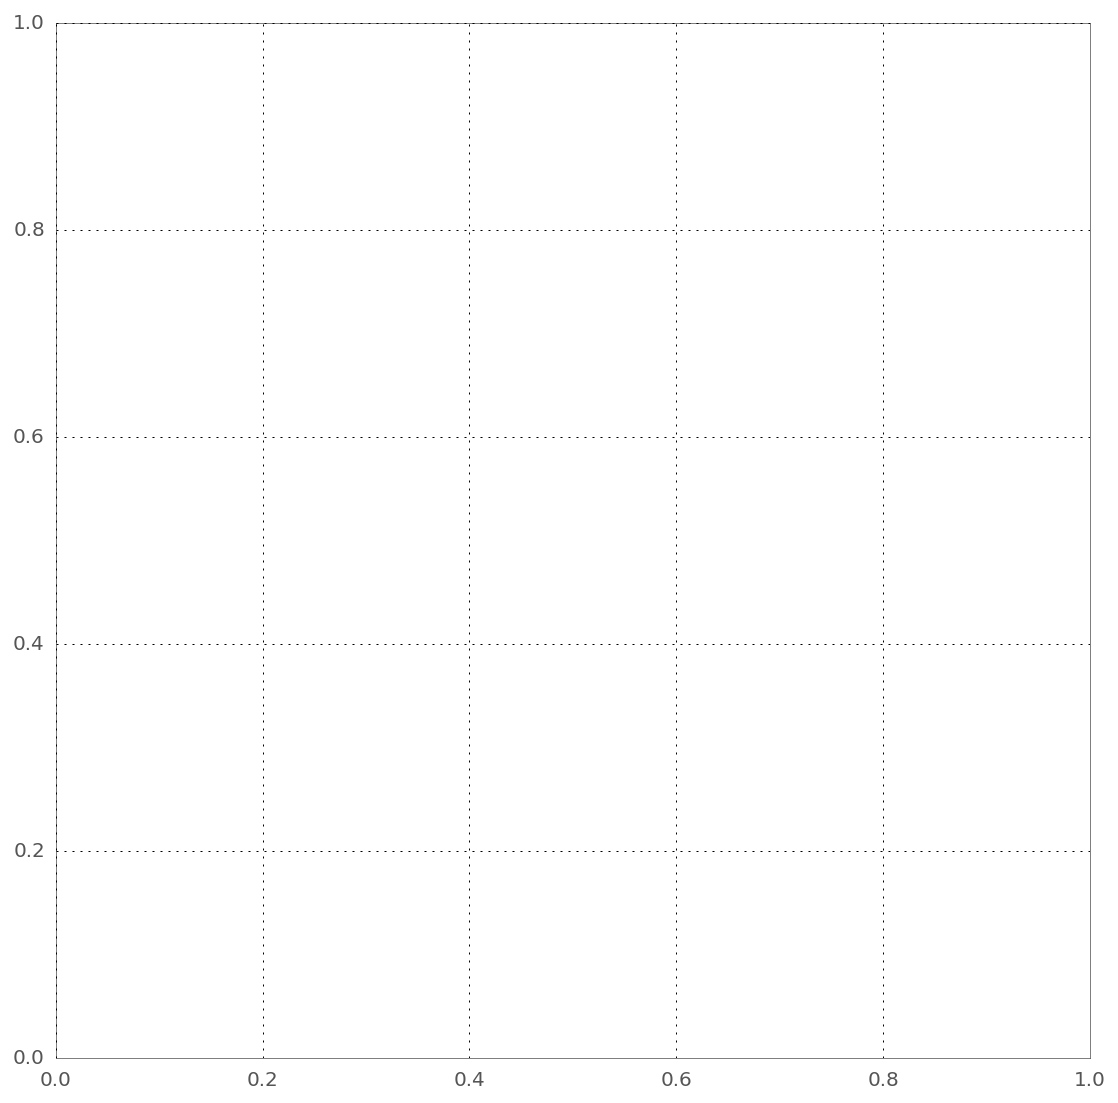

In [44]:
experiments = ['prior_vanilla', 'prior_firstorder']
databases = [name_database_] * len(experiments)
labels = ['control', 'with prior']
mps = [mp] * len(experiments)
fig = plt.figure(figsize=(fig_width/1.618, fig_width/1.618))
fig, a, ax = mp.plot(mps=mps, experiments=experiments, databases=databases, fig=fig, labels=labels, 
                  color=[0., 0., 1.], threshold=0.3, ref=0, scale=True)#  


In [ ]:
experiments = ['prior_quant', 'prior_quant_firstorder']
databases = [name_database_] * len(experiments)
labels = ['control', 'with prior']
mps = [mp] * len(experiments)
fig = plt.figure(figsize=(fig_width/1.618, fig_width/1.618))
fig, a, ax = mp.plot(mps=mps, experiments=experiments, databases=databases, fig=fig, labels=labels, 
                  color=[0., 0., 1.], threshold=0.6, ref=0, scale=True)#  , threshold=0.3, ref=0


In [ ]:
experiments = ['prior_vanilla', 'prior_firstorder']
databases = [name_database_] * len(experiments)
labels = ['control', 'with prior']
mps = [mp] * len(experiments)
fig = plt.figure(figsize=(fig_width/1.618, fig_width/1.618))
fig, a, ax = mp.plot(mps=mps, experiments=experiments, databases=databases, fig=fig, labels=labels, 
                  color=[0., 0., 1.], threshold=0.55, ref=0, scale=True)#  


In [ ]:
experiments = ['prior_vanilla', 'prior_firstorder']
databases = [name_database_] * len(experiments)
labels = ['control', 'with prior']
mps = [mp] * len(experiments)
fig = plt.figure(figsize=(fig_width/1.618, fig_width/1.618))
fig, a, ax = mp.plot(mps=mps, experiments=experiments, databases=databases, fig=fig, labels=labels, 
                  color=[0., 0., 1.], threshold=0.8, ref=0, scale=True)#  


In [ ]:
experiments = ['prior_vanilla_noise_' + str(mp.pe.noise).replace('.', '_'), 'prior_firstorder_noise_' + str(mp.pe.noise).replace('.', '_')]
databases = [name_database_] * len(experiments)
labels = ['control', 'with prior']
mps = [mp] * len(experiments)
fig = plt.figure(figsize=(fig_width/1.618, fig_width/1.618))
fig, a, ax = mp.plot(mps=mps, experiments=experiments, databases=databases, fig=fig, labels=labels, 
                  color=[0., 0., 1.], threshold=0.5, ref=0, scale=True)#  


In [ ]:
FORMATS = ['pdf', 'eps']
#experiments = ['prior_vanilla', 'prior_firstorder', 'prior_vanilla_noise_' + str(pe.noise).replace('.', '_'), 'prior_firstorder_noise_' + str(pe.noise).replace('.', '_')]
#experiments = ['prior_vanilla', 'prior_vanilla_noise_' + str(pe.noise).replace('.', '_'), 'prior_firstorder_noise_' + str(pe.noise).replace('.', '_')]
#experiments = ['prior_vanilla_noise_' + str(pe.noise).replace('.', '_'), 'prior_firstorder_noise_' + str(pe.noise).replace('.', '_')]
#experiments = ['prior_vanilla_noise_' + str(pe.noise).replace('.', '_'), 'prior_firstorder_noise_' + str(pe.noise).replace('.', '_')]
experiments = ['prior_vanilla', 'prior_firstorder']
databases = [name_database_] * len(experiments)
#databases = ['laboratory'] * len(experiments)
#labels = ['control', 'with prior', 'noise', 'noise (prior)']
#labels = ['control', 'noise', 'noise (prior)']
labels = ['control', 'with prior']
mps = [mp] * len(experiments)
fig = plt.figure(figsize=(fig_width/1.618, fig_width/1.618))
fig, a, ax = mp.plot(mps=mps, experiments=experiments, databases=databases, fig=fig, labels=labels, 
                  color=[0., 0., 1.], threshold=0.3, ref=0, scale=True)#  
for ext in FORMATS: fig.savefig(mp.pe.figpath + 'firstorder_C.' + ext)

In [ ]:
imageslist, edgeslist, RMSE = mp.process(exp='prior_vanilla', name_database=name_database_)
v_hist, v_theta_edges = mp.histedges_theta(edgeslist, display=False)
v_theta_middles, v_theta_bin  = (v_theta_edges[1:]+v_theta_edges[:-1])/2, v_theta_edges[1]-v_theta_edges[0]
z = np.linspace(0, 1., mp.pe.n_theta+1)
P = np.cumsum(np.hstack((0, v_hist[-1]/2, v_hist[:-1], v_hist[-1]/2)))
theta_prior = np.interp(z, P, np.hstack((v_theta_edges[0]-v_theta_bin/2, v_theta_edges[:-1], v_theta_edges[-1]-v_theta_bin/2))) #% np.pi
print ('angles (deg) = ', theta_prior*180/np.pi)

In [ ]:
imageslist, edgeslist, RMSE = mp.process(exp='prior_firstorder', name_database=name_database_)

In [ ]:
print ('angles (deg) = ', theta_prior*180/np.pi)

#theta_bin = np.linspace(- np.pi/2  + np.pi/mp.pe.N_Dtheta/2, np.pi/2  + np.pi/mp.pe.N_Dtheta/2, 48)
#theta_bin = np.hstack((theta_prior, theta_prior[0]+np.pi)) - np.pi/320#mp.pe.N_Dtheta/2
theta_bin = .5 * (theta_prior[:-1] + theta_prior[1:])
#( np.hstack((theta_prior[-2]-np.pi, theta_prior)) +
 #                 np.hstack((theta_prior, theta_prior[1]+np.pi)) )
theta_bin = np.hstack((theta_bin, theta_bin[0]+np.pi)) 
print ('angles (deg) = ',  theta_bin*180/np.pi)

#theta_firstbin = (theta_bin[1]-theta_bin[0])/2.
#print theta_firstbin*180/np.pi
theta = (edgeslist[2, ...].ravel())
#theta = ((theta + np.pi/2 - np.pi/mp.pe.N_Dtheta/2)  % np.pi ) - np.pi/2  + np.pi/mp.pe.N_Dtheta/2
#print theta.min()*180/np.pi, theta.max()*180/np.pi, (theta.max()-theta.min())*180/np.pi
#theta = ((theta + (np.pi/2 + theta_firstbin) )  % np.pi ) - (np.pi/2  + theta_firstbin)
#print theta.min()*180/np.pi, theta.max()*180/np.pi, (theta.max()-theta.min())*180/np.pi
value = edgeslist[4, ...].ravel()

if False: #mp.pe.edge_mask:
    # remove edges whose center position is not on the central disk
    x , y = edgeslist[0, ...].ravel().real, edgeslist[1, ...].ravel().real
    mask = ((x/mp.N_X -.5)**2+(y/mp.N_Y -.5)**2) < .5**2
    theta = theta[mask]
    value = value[mask]

weights = np.absolute(value)/(np.absolute(value)).sum()

v_hist, v_theta_edges_ = np.histogram(theta, bins=theta_bin, density=False, weights=weights)
print ('angles (deg) = ',  v_theta_edges_*180/np.pi)
print (v_hist)

#plotting
fig = plt.figure(figsize=(fig_width/1.618, fig_width/1.618))
ax = fig.add_subplot(111, axisbg='w', polar=True)
#fig, ax = mp.histedges_theta(edgeslist, fig=fig, a=ax)
#v_hist, v_theta_edges = mp.histedges_theta(edgeslist, display=False)
v_hist /= v_hist.mean() # convenience normalization to compare with uniform histogram
ax.bar(v_theta_edges_[1:], np.sqrt(v_hist), width=v_theta_edges_[:-1] - v_theta_edges_[1:], color='#66c0b7')# edgecolor="none")
ax.bar(v_theta_edges_[1:]+np.pi, np.sqrt(v_hist), width=v_theta_edges_[:-1] - v_theta_edges_[1:], color='#32ab9f')
ax.plot(v_theta_edges_, np.ones_like(v_theta_edges_), 'r--')
ax.plot(v_theta_edges_+np.pi, np.ones_like(v_theta_edges_), 'r--')
plt.setp(ax, yticks=[])
for ext in FORMATS: fig.savefig(mp.pe.figpath + 'firstorder_B.' + ext)

In [ ]:
imageslist, edgeslist, RMSE =  mp.process('prior_firstorder', name_database=name_database_)
theta = (edgeslist[2, ...].ravel())
vhist, vbins, patches = plt.hist(theta, bins = 360)

In [ ]:
vbins[vhist>0.]*180/np.pi

In [ ]:
vhist[vhist>0.]

In [ ]:
edgeslist.shape

In [ ]:
%cd ..

## some book keeping for the notebook

In [ ]:
%install_ext https://raw.githubusercontent.com/rasbt/python_reference/master/ipython_magic/watermark.py
%load_ext watermark
%watermark

In [ ]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%version_information numpy, scipy, matplotlib, sympy